In [1]:
using Distributions, Plots;

┌ Info: Recompiling stale cache file C:\Users\Piotr\.julia\compiled\v1.1\Distributions\xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\Piotr\.julia\compiled\v1.1\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [48]:
"""
create_kmeans zwraca funkcję etykietującą (i etykiety)
"""
function create_kmeans(X, k, I = 1000; norm = (x,v) -> sum((x-v).^2))
    
    # Tu wyliczam etykiety
    function get_label(x, centroids)
        return argmin(map(i -> norm(x, centroids[i,:]), 1:size(centroids,1)))
    end
    
    # Tu wyliczam centroidy
    function compute_centroids(X, labels) 
        centroids = zeros(k, size(X,2))
        for l in 1:k
            centroids[l,:] = mean(X[labels .== l, :], dims = 1)
        end
        return centroids
    end
    
    centroids = X[sample(1:size(X,1), k, replace=false), :]
    labels = zeros(size(X,1),1)
    
    for i in 1:I
        labels = map(i -> get_label(X[i,:], centroids), 1:size(X,1))
        centroids = compute_centroids(X, labels)
    end
    
    return x -> get_label(x, centroids), centroids, labels
end

create_kmeans

# Test

In [49]:
n = 1000
X = zeros(2n, 2)
a = 0
b = 5
X[1:n, :] = [rand(Normal(a, 1), n) rand(Normal(a, 1), n)]
X[(n+1):2n, :] = [rand(Normal(b, 1), n) rand(Normal(b, 1), n)];

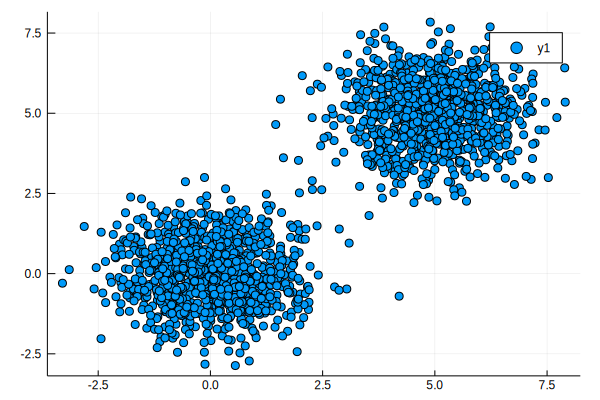

In [50]:
scatter(X[:,1], X[:,2])

In [52]:
kmeans, centroids, labels = create_kmeans(X, 2)

(getfield(Main, Symbol("##97#104")){getfield(Main, Symbol("#get_label#100")){getfield(Main, Symbol("##98#105"))}}(getfield(Main, Symbol("#get_label#100")){getfield(Main, Symbol("##98#105"))}(getfield(Main, Symbol("##98#105"))()), Core.Box([4.94055 4.99096; 0.00624804 -0.00033589])), [4.94055 4.99096; 0.00624804 -0.00033589], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

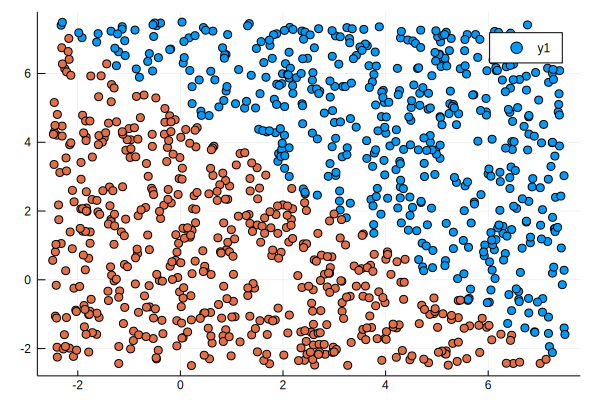

In [78]:
n = 1000
T = rand(Uniform(-2.5,7.5), 1000, 2)

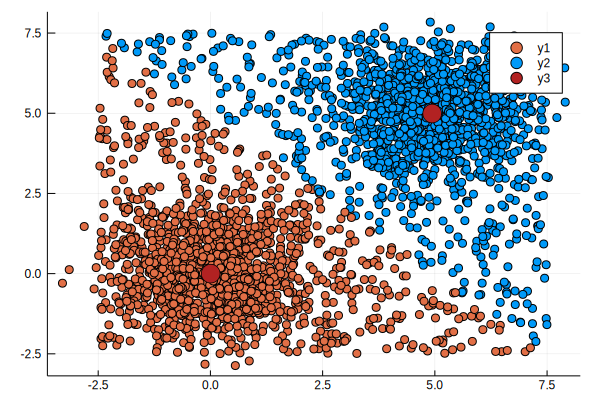

In [79]:
scatter(X[:,1], X[:,2], markercolor=labels)
scatter!(T[:,1], T[:,2], markercolor = map(i -> kmeans(T[i,:]), 1:size(T,1)))
scatter!(centroids[:,1],centroids[:,2], markersize = 10, markercolor = :firebrick)